<a href="https://colab.research.google.com/github/mohammadsedehi78/Spectral-clustering/blob/master/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
from math import sqrt 

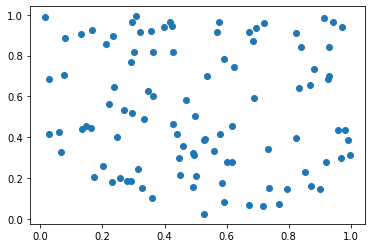

In [33]:
X, y =np.random.rand(100,2), None
plt.scatter(X[:,0], X[:,1])

In [34]:
def euclideon_distance(row1 , row2 ):
  distance= 0.0
  for i in range(len(row1)):
    distance += ( row1[i] - row2[i])**2
  return sqrt(distance)

In [35]:
def get_neighbors(train , test_row , num_neighbos):
  distances = list()
  index=0
  for train_row in train :
    dist = euclideon_distance( test_row , train_row)
    # print("/////",test_row , train_row,dist,index)
    # if dist!=0:
    distances.append((train_row , dist,index))
    index+=1
  distances.sort (key = lambda tup : tup[1])
  # print(distances[:][1] , " 555")
  neighbors= list() 
  # plt.scatter(X[:,0], X[:,1])
  
  for i in range(num_neighbos):
    # plt.scatter(distances [i][0][0], distances [i][0][1], s=300, c='red')
    # if distances[i][1]==0:
      # plt.scatter(distances [i][0][0], distances [i][0][1], s=300, c='green')
    # print(distances [i][1],"!!!!!!!!!!!!!!!!",i)
    neighbors.append (distances [i][2])
  # plt.show()
  return neighbors


In [36]:
def make_affinity_matrix ( train , num_neighbors):
  affinity_matrix=np.zeros((len(train),len(train)))
  i=0
  for train_row in train :
    # i=0
    neighbors_index = get_neighbors(train , train_row , num_neighbors+1)
    for index in neighbors_index:
      affinity_matrix[i][index]=1
    i+=1
  return affinity_matrix
  # output_values = [row[-1] for row in neighbors]
  # prediction = max ( set (output_values ), key = output_values.count)
  # return prediction

[[1. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


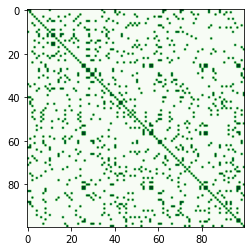

In [39]:
r=make_affinity_matrix ( X  , 10)
r=np.array(r)
print(r)
plt.imshow(r,cmap ='Greens')
# print(type(X))
# print(X)
